Analizando la relación entre bmi y target en el conjunto de datos de diabetes
--------------------------------------------------------------------------------

### Estadísticas descriptivas ###
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000

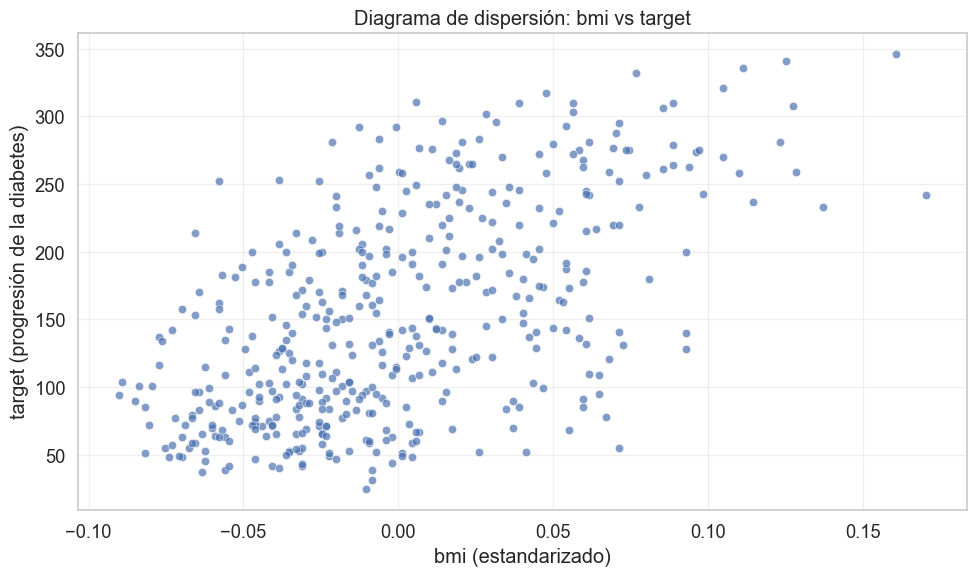


### Pruebas de normalidad ###
Shapiro-Wilk para bmi: Estadístico=0.9728, p-valor=0.0000
Conclusión: No normal
Shapiro-Wilk para target: Estadístico=0.9491, p-valor=0.0000
Conclusión: No normal


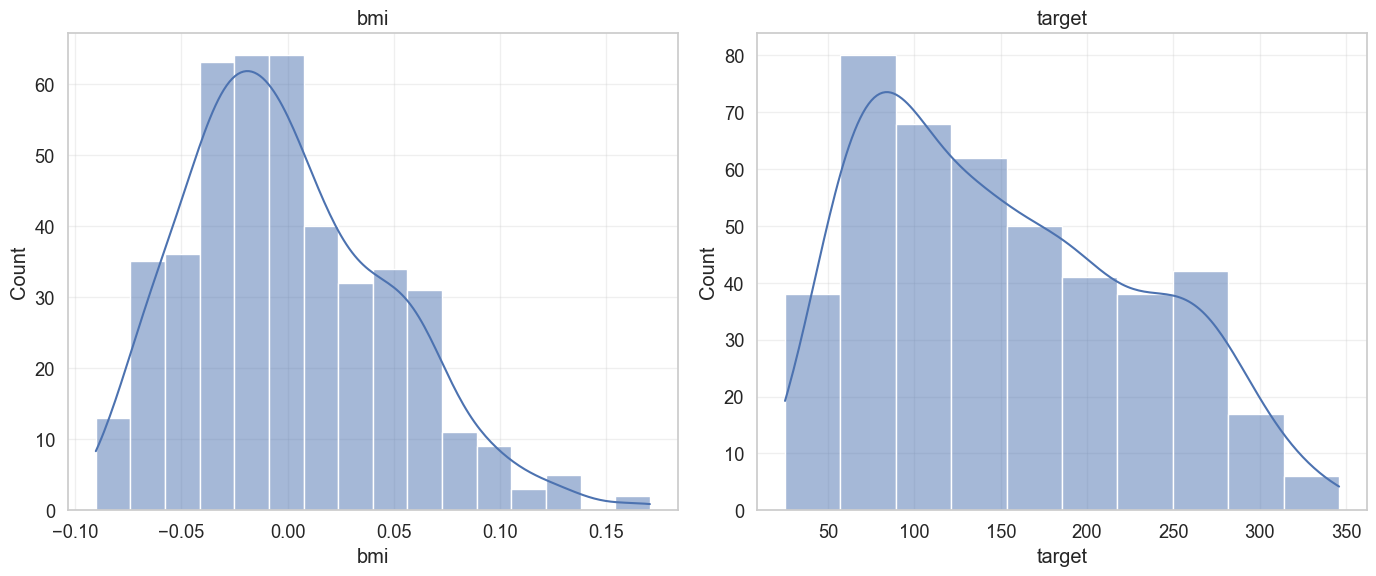

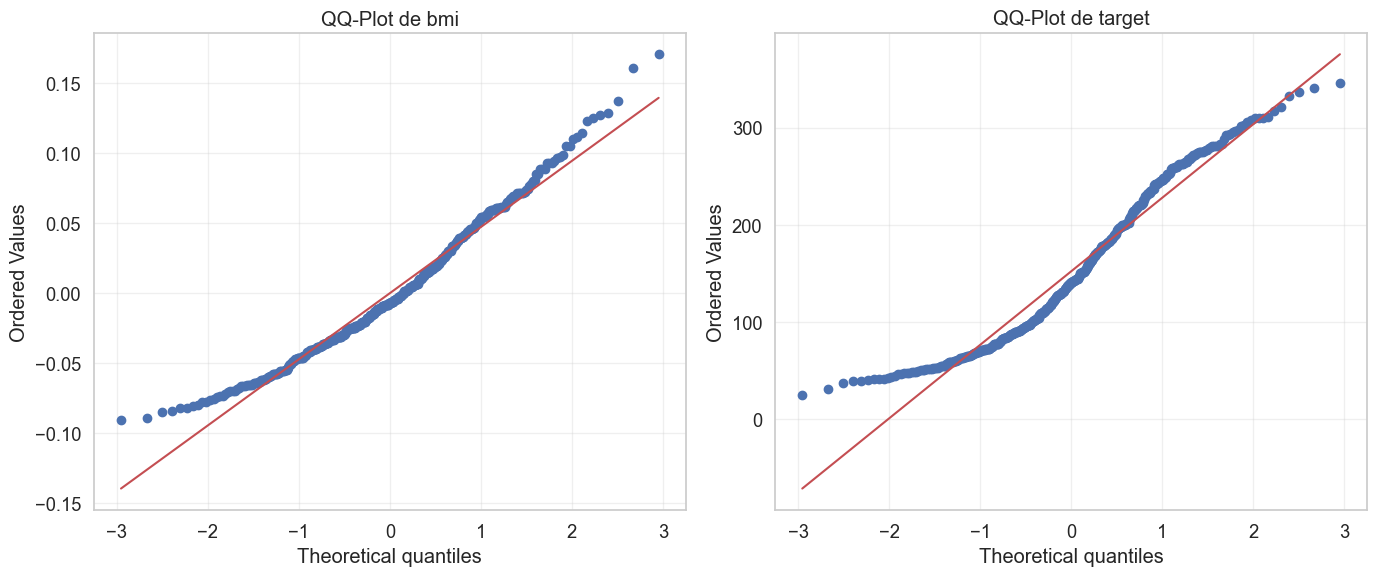


### Coeficientes de correlación ###
Pearson: 0.5865, p-valor: 0.0000
Spearman: 0.5614, p-valor: 0.0000
Kendall: 0.3912, p-valor: 0.0000


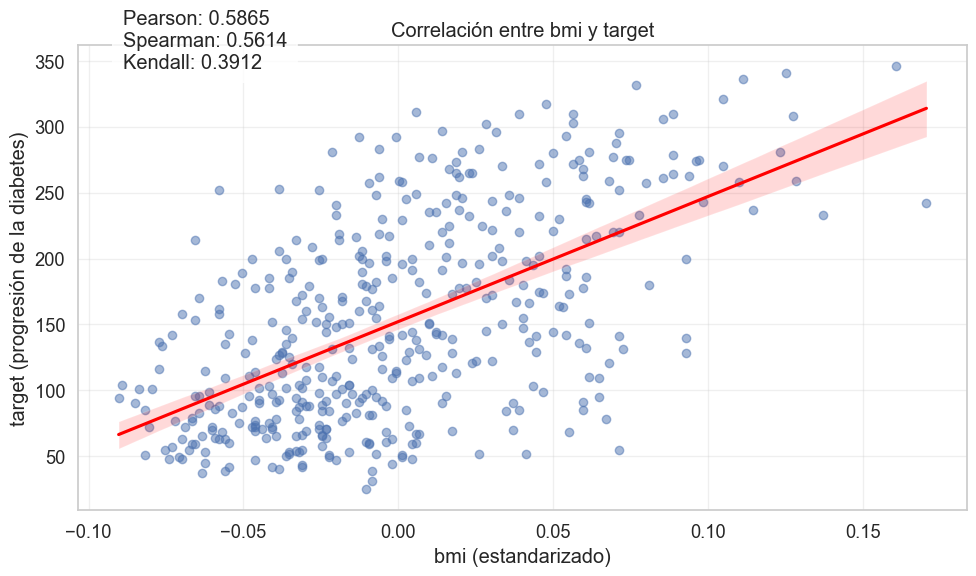


### Comparación de coeficientes de correlación (casos sintéticos) ###


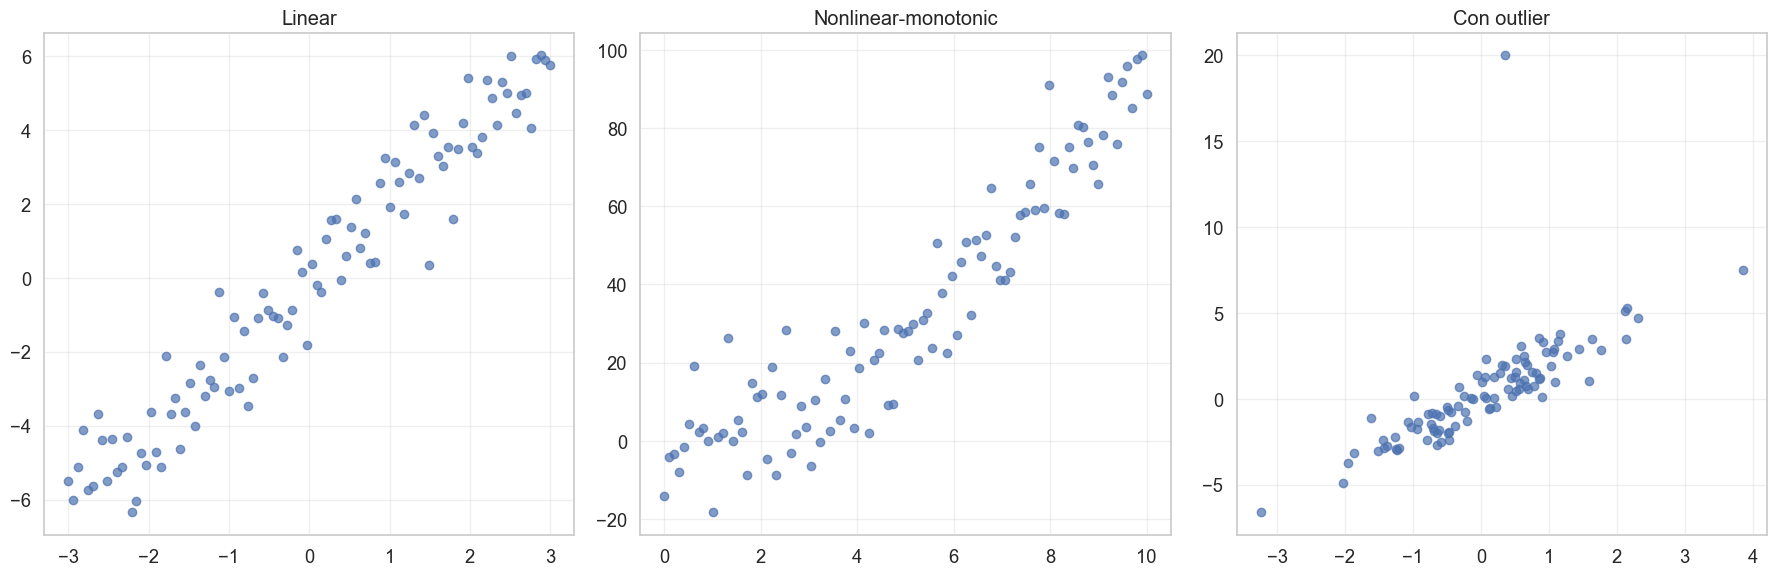

Pearson: lineal y normal / Spearman-Kendall: monotónica, no lineal, o outliers.

### Prueba t para la correlación de Pearson ###
t estadístico: 15.1873, p-valor: 0.00000000
Conclusión: Rechazamos H0
IC 95% Pearson: [0.5217, 0.6445]

### Regresión Lineal (sklearn) ###
Pendiente: 949.4353, Intercepto: 152.1335
Ecuación: y = 949.4353x + 152.1335
MSE: 3890.4566, RMSE: 62.3735, R²: 0.3439


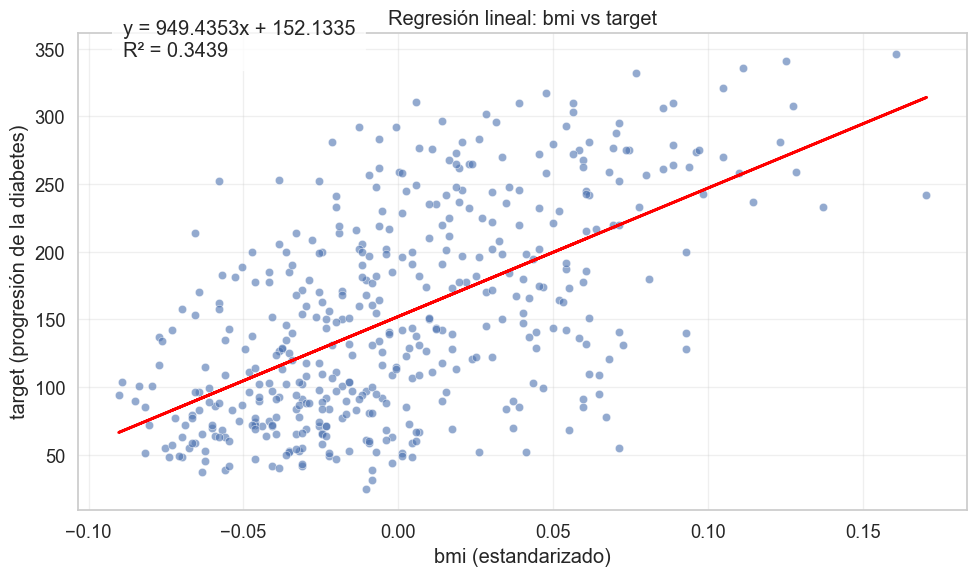


### Análisis de Regresión con statsmodels ###
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           3.47e-42
Time:                        11:43:13   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

C:\Users\anfalear\AppData\Local\Temp\ipykernel_18560\2342830980.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"p-valor para {x_var}: {model_sm.pvalues[1]:.8f} =>",
C:\Users\anfalear\AppData\Local\Temp\ipykernel_18560\2342830980.py:173: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "Significativa" if model_sm.pvalues[1] < 0.05 else "No significativa")


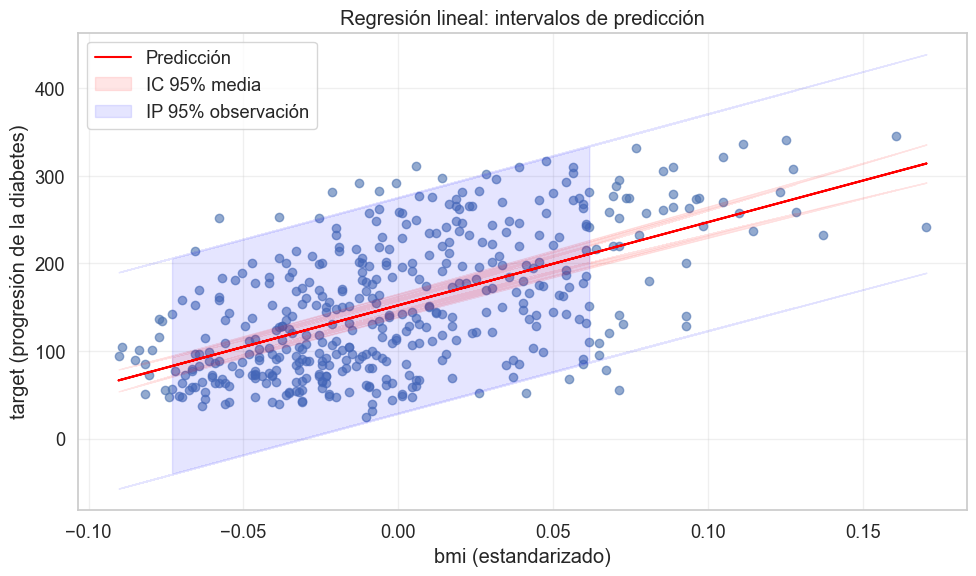


### Diagnóstico de residuos ###
Shapiro-Wilk residuos: Estadístico=0.9904, p-valor=0.0054
Conclusión: No normales


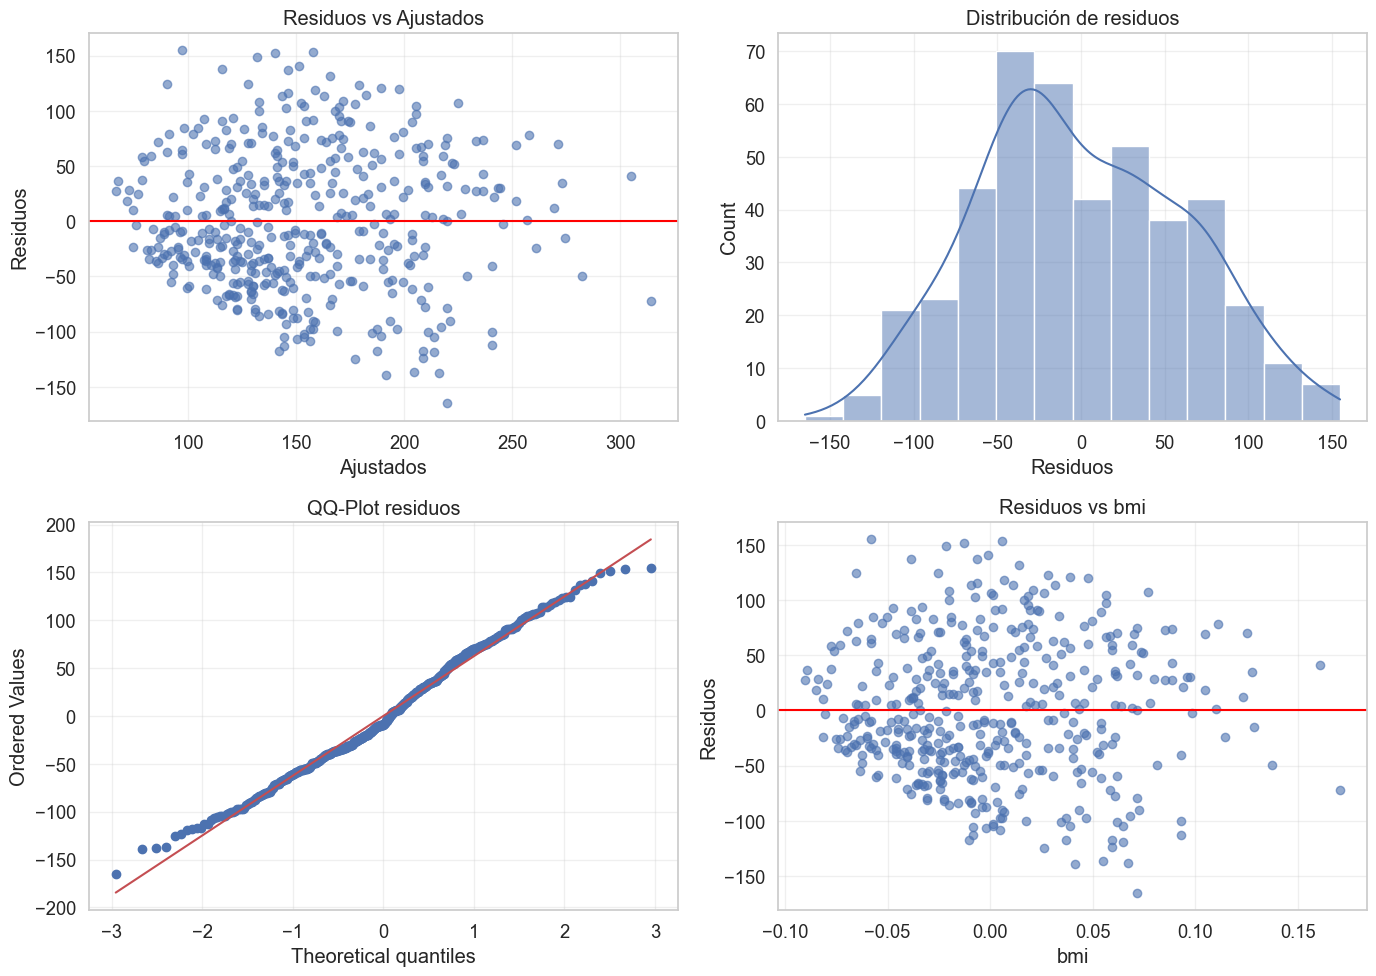


### Conclusiones ###
1. Correlación de Pearson: 0.5865 (p=0.00000000) entre bmi y target.
2. Pendiente de la regresión: 949.4353
3. El modelo explica el 34.39% de la variabilidad en target (R² = 0.3439).
No normalidad en al menos una variable; se recomienda Spearman (0.5614).
Este análisis permite interpretar la relación entre IMC y progresión de diabetes.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.stats import shapiro, spearmanr, kendalltau, pearsonr

# Configuración de estilo
plt.rcParams['figure.figsize'] = (12, 8)
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# 1. Carga y preparación de los datos
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y

# Variables clave
x_var = 'bmi'
y_var = 'target'
print(f"Analizando la relación entre {x_var} y {y_var} en el conjunto de datos de diabetes")
print("-" * 80)

# 2. Estadísticas descriptivas
print("\n### Estadísticas descriptivas ###")
print(df.describe())
print(f"\nEstadísticas para {x_var} y {y_var}:")
print(df[[x_var, y_var]].describe())

# 3. Diagrama de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[x_var], y=df[y_var], alpha=0.7)
plt.title(f'Diagrama de dispersión: {x_var} vs {y_var}')
plt.xlabel(f'{x_var} (estandarizado)')
plt.ylabel(f'{y_var} (progresión de la diabetes)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Pruebas de normalidad
print("\n### Pruebas de normalidad ###")
stat_x, p_x = shapiro(df[x_var])
print(f"Shapiro-Wilk para {x_var}: Estadístico={stat_x:.4f}, p-valor={p_x:.4f}")
print("Conclusión:", "Distribución normal" if p_x > 0.05 else "No normal")

stat_y, p_y = shapiro(df[y_var])
print(f"Shapiro-Wilk para {y_var}: Estadístico={stat_y:.4f}, p-valor={p_y:.4f}")
print("Conclusión:", "Distribución normal" if p_y > 0.05 else "No normal")

# Histogramas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df[x_var], kde=True, ax=axes[0])
axes[0].set_title(f'{x_var}')
axes[0].set_xlabel(x_var)
axes[0].grid(True, alpha=0.3)
sns.histplot(df[y_var], kde=True, ax=axes[1])
axes[1].set_title(f'{y_var}')
axes[1].set_xlabel(y_var)
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# QQ-plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
stats.probplot(df[x_var], plot=axes[0])
axes[0].set_title(f'QQ-Plot de {x_var}')
axes[0].grid(True, alpha=0.3)
stats.probplot(df[y_var], plot=axes[1])
axes[1].set_title(f'QQ-Plot de {y_var}')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Correlación
print("\n### Coeficientes de correlación ###")
pearson_corr, pearson_p = pearsonr(df[x_var], df[y_var])
print(f"Pearson: {pearson_corr:.4f}, p-valor: {pearson_p:.4f}")

spearman_corr, spearman_p = spearmanr(df[x_var], df[y_var])
print(f"Spearman: {spearman_corr:.4f}, p-valor: {spearman_p:.4f}")

kendall_corr, kendall_p = kendalltau(df[x_var], df[y_var])
print(f"Kendall: {kendall_corr:.4f}, p-valor: {kendall_p:.4f}")

plt.figure(figsize=(10, 6))
sns.regplot(x=df[x_var], y=df[y_var], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title(f'Correlación entre {x_var} y {y_var}')
plt.xlabel(f'{x_var} (estandarizado)')
plt.ylabel(f'{y_var} (progresión de la diabetes)')
plt.annotate(f'Pearson: {pearson_corr:.4f}\nSpearman: {spearman_corr:.4f}\nKendall: {kendall_corr:.4f}',
             xy=(0.05, 0.95), xycoords='axes fraction', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Ejemplo de comparación de coeficientes con casos sintéticos
print("\n### Comparación de coeficientes de correlación (casos sintéticos) ###")
np.random.seed(42)
n = 100
x_linear = np.linspace(-3, 3, n)
y_linear = 2 * x_linear + np.random.normal(0, 1, n)
x_nonlinear = np.linspace(0, 10, n)
y_nonlinear = x_nonlinear**2 + np.random.normal(0, 10, n)
x_outliers = np.random.normal(0, 1, n)
y_outliers = 2 * x_outliers + np.random.normal(0, 1, n)
y_outliers[0] = 20  # valor atípico

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].scatter(x_linear, y_linear, alpha=0.7)
axes[0].set_title('Linear')
axes[1].scatter(x_nonlinear, y_nonlinear, alpha=0.7)
axes[1].set_title('Nonlinear-monotonic')
axes[2].scatter(x_outliers, y_outliers, alpha=0.7)
axes[2].set_title('Con outlier')
for ax in axes: ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("Pearson: lineal y normal / Spearman-Kendall: monotónica, no lineal, o outliers.")

# 7. Prueba de significancia de la correlación
print("\n### Prueba t para la correlación de Pearson ###")
n_muestra = len(df[x_var])
t_stat = pearson_corr * np.sqrt((n_muestra - 2) / (1 - pearson_corr ** 2))
p_val = 2 * (1 - stats.t.cdf(abs(t_stat), n_muestra - 2))
print(f"t estadístico: {t_stat:.4f}, p-valor: {p_val:.8f}")
print(f"Conclusión:", "Rechazamos H0" if p_val < 0.05 else "No rechazamos H0")

# Intervalo de confianza para la correlación
z = np.arctanh(pearson_corr)
se = 1 / np.sqrt(n_muestra - 3)
ci_lower = np.tanh(z - 1.96 * se)
ci_upper = np.tanh(z + 1.96 * se)
print(f"IC 95% Pearson: [{ci_lower:.4f}, {ci_upper:.4f}]")

# 8. Regresión lineal con sklearn
print("\n### Regresión Lineal (sklearn) ###")
X_reg = df[[x_var]]
y_reg = df[y_var]
model = LinearRegression()
model.fit(X_reg, y_reg)
print(f"Pendiente: {model.coef_[0]:.4f}, Intercepto: {model.intercept_:.4f}")
print(f"Ecuación: y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}")
y_pred = model.predict(X_reg)
mse = mean_squared_error(y_reg, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_reg, y_pred)
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[x_var], y=df[y_var], alpha=0.6)
plt.plot(df[x_var], y_pred, color='red', linewidth=2)
plt.title(f'Regresión lineal: {x_var} vs {y_var}')
plt.xlabel(f'{x_var} (estandarizado)')
plt.ylabel(f'{y_var} (progresión de la diabetes)')
plt.annotate(f'y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}\nR² = {r2:.4f}',
             xy=(0.05, 0.95), xycoords='axes fraction', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 9. Análisis de regresión con statsmodels
print("\n### Análisis de Regresión con statsmodels ###")
X_sm = sm.add_constant(X_reg)
model_sm = sm.OLS(y_reg, X_sm).fit()
print(model_sm.summary())
print(f"p-valor para {x_var}: {model_sm.pvalues[1]:.8f} =>",
      "Significativa" if model_sm.pvalues[1] < 0.05 else "No significativa")

# 10. Intervalos de predicción
print("\n### Intervalos de predicción ###")
predictions = model_sm.get_prediction(X_sm)
pred_summary = predictions.summary_frame(alpha=0.05)
plt.figure(figsize=(10, 6))
plt.scatter(df[x_var], df[y_var], alpha=0.6)
plt.plot(df[x_var], pred_summary['mean'], color='red', label='Predicción')
plt.fill_between(df[x_var], pred_summary['mean_ci_lower'], pred_summary['mean_ci_upper'], color='red', alpha=0.1, label='IC 95% media')
plt.fill_between(df[x_var], pred_summary['obs_ci_lower'], pred_summary['obs_ci_upper'], color='blue', alpha=0.1, label='IP 95% observación')
plt.title(f'Regresión lineal: intervalos de predicción')
plt.xlabel(f'{x_var} (estandarizado)')
plt.ylabel(f'{y_var} (progresión de la diabetes)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 11. Diagnóstico de residuos
print("\n### Diagnóstico de residuos ###")
residuos = df[y_var] - y_pred
stat_residuos, p_residuos = shapiro(residuos)
print(f"Shapiro-Wilk residuos: Estadístico={stat_residuos:.4f}, p-valor={p_residuos:.4f}")
print("Conclusión:", "Normales" if p_residuos > 0.05 else "No normales")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes[0, 0].scatter(y_pred, residuos, alpha=0.6)
axes[0, 0].axhline(0, color='red')
axes[0, 0].set_title('Residuos vs Ajustados')
axes[0, 0].set_xlabel('Ajustados')
axes[0, 0].set_ylabel('Residuos')
axes[0, 0].grid(True, alpha=0.3)
sns.histplot(residuos, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de residuos')
axes[0, 1].set_xlabel('Residuos')
axes[0, 1].grid(True, alpha=0.3)
stats.probplot(residuos, plot=axes[1, 0])
axes[1, 0].set_title('QQ-Plot residuos')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 1].scatter(df[x_var], residuos, alpha=0.6)
axes[1, 1].axhline(0, color='red')
axes[1, 1].set_title(f'Residuos vs {x_var}')
axes[1, 1].set_xlabel(x_var)
axes[1, 1].set_ylabel('Residuos')
axes[1, 1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 12. Conclusiones finales
print("\n### Conclusiones ###")
print(f"1. Correlación de Pearson: {pearson_corr:.4f} (p={pearson_p:.8f}) entre {x_var} y {y_var}.")
print(f"2. Pendiente de la regresión: {model.coef_[0]:.4f}")
print(f"3. El modelo explica el {r2*100:.2f}% de la variabilidad en {y_var} (R² = {r2:.4f}).")
if p_x > 0.05 and p_y > 0.05:
    print(f"Ambas variables son normales, Pearson ({pearson_corr:.4f}) es adecuado.")
else:
    print(f"No normalidad en al menos una variable; se recomienda Spearman ({spearman_corr:.4f}).")
print("Este análisis permite interpretar la relación entre IMC y progresión de diabetes.")


Relación entre AveRooms y target en California Housing
--------------------------------------------------------------------------------

### Estadísticas descriptivas ###
           AveRooms        target
count  20640.000000  20640.000000
mean       5.429000      2.068558
std        2.474173      1.153956
min        0.846154      0.149990
25%        4.440716      1.196000
50%        5.229129      1.797000
75%        6.052381      2.647250
max      141.909091      5.000010

Asimetría de AveRooms: 20.6979
Curtosis de AveRooms: 879.3533
Asimetría de target: 0.9778
Curtosis de target: 0.3279


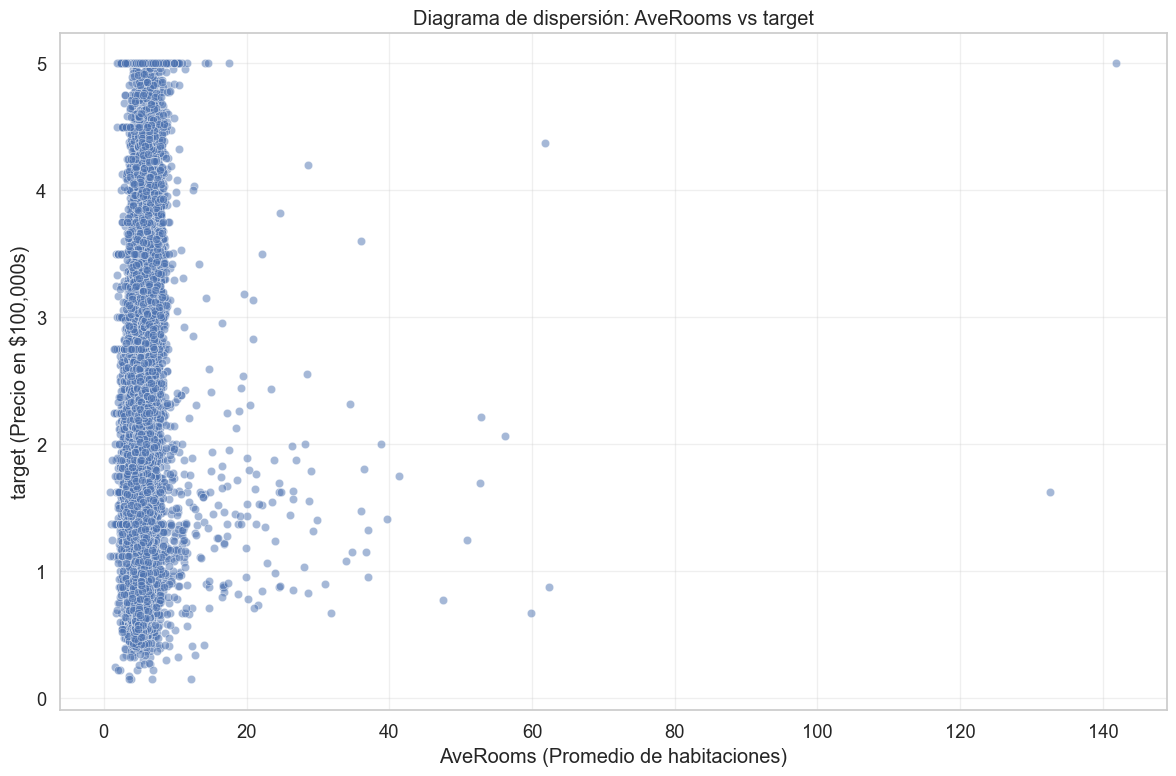


Shapiro-Wilk para AveRooms (muestra): Estadístico=0.3601, p-valor=0.0000
Shapiro-Wilk para target (muestra): Estadístico=0.9107, p-valor=0.0000
D'Agostino-Pearson para AveRooms: Estadístico=46229.2122, p-valor=0.00000000
D'Agostino-Pearson para target: Estadístico=2430.9311, p-valor=0.00000000


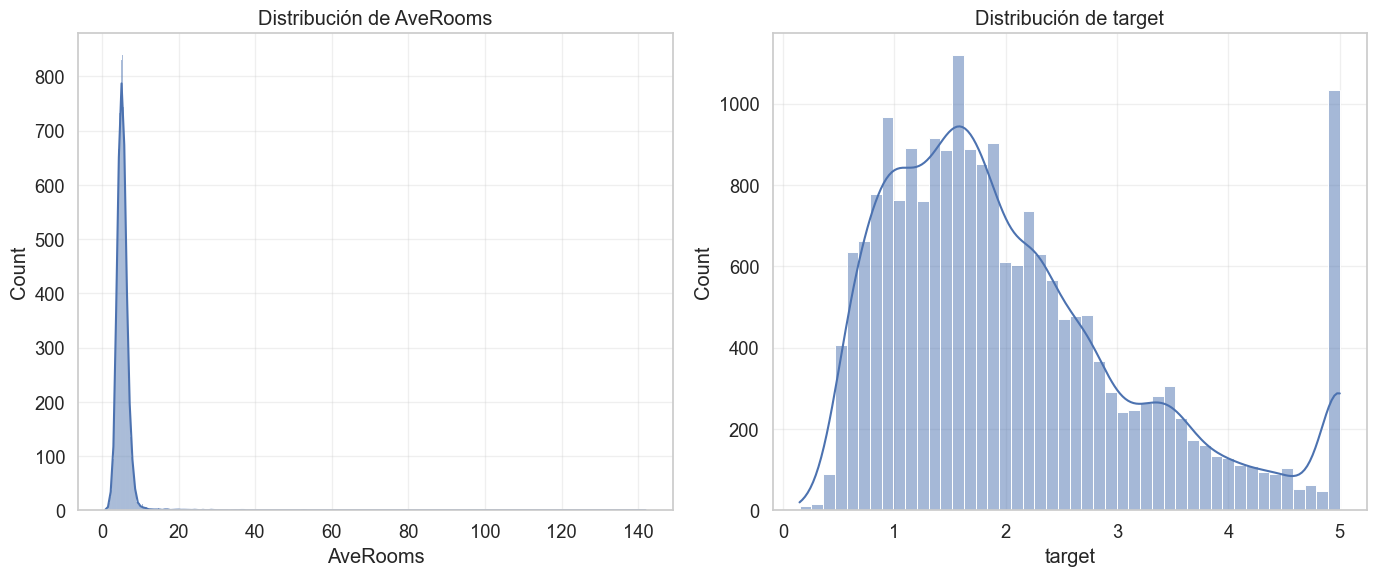

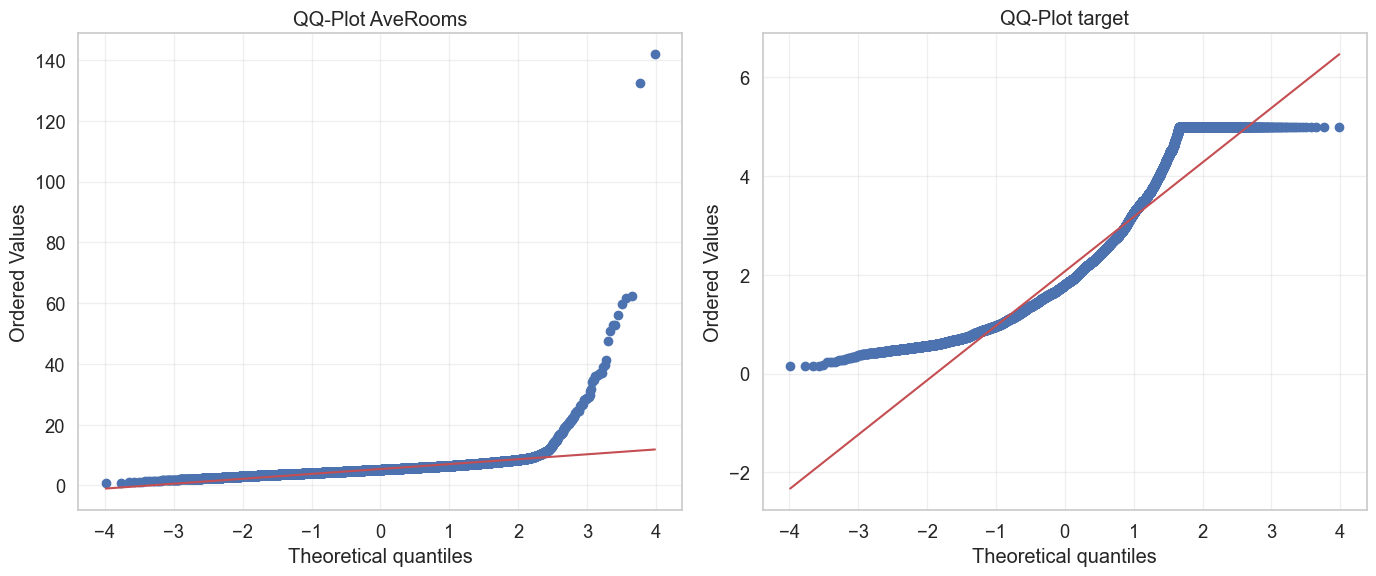


Pearson: 0.1519, p=0.00000000
Spearman: 0.2634, p=0.00000000
Kendall: 0.1792, p=0.00000000


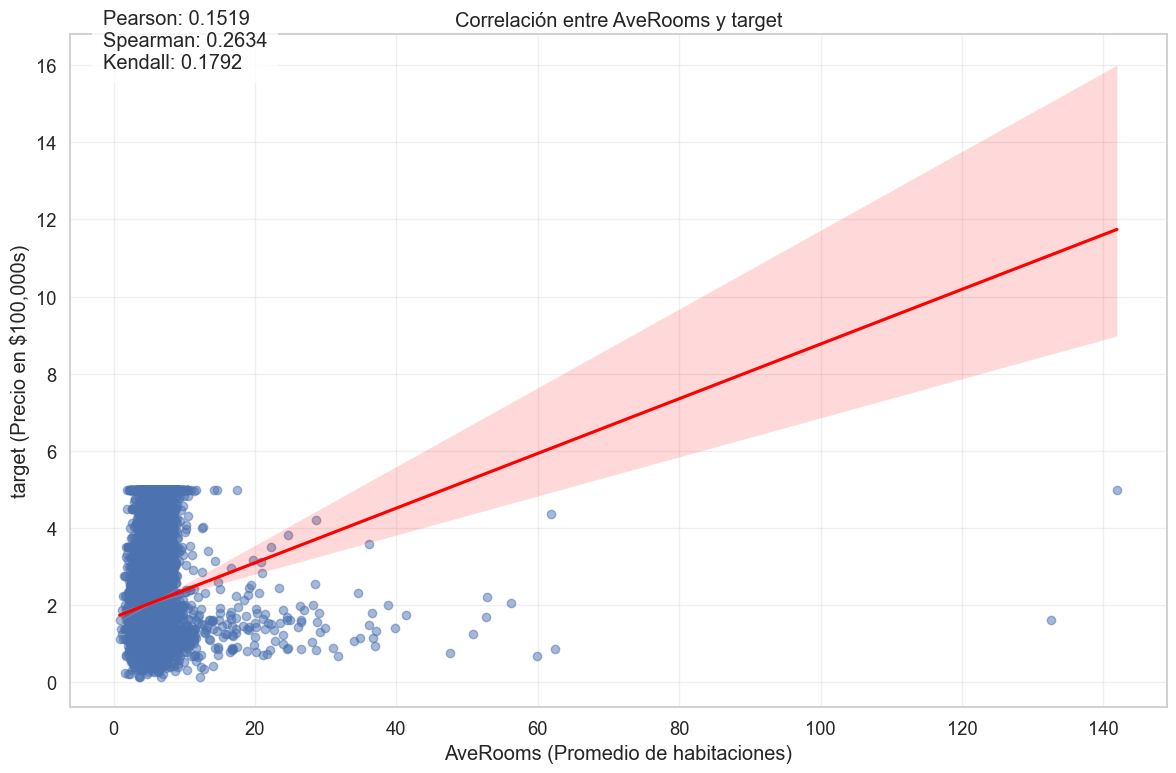

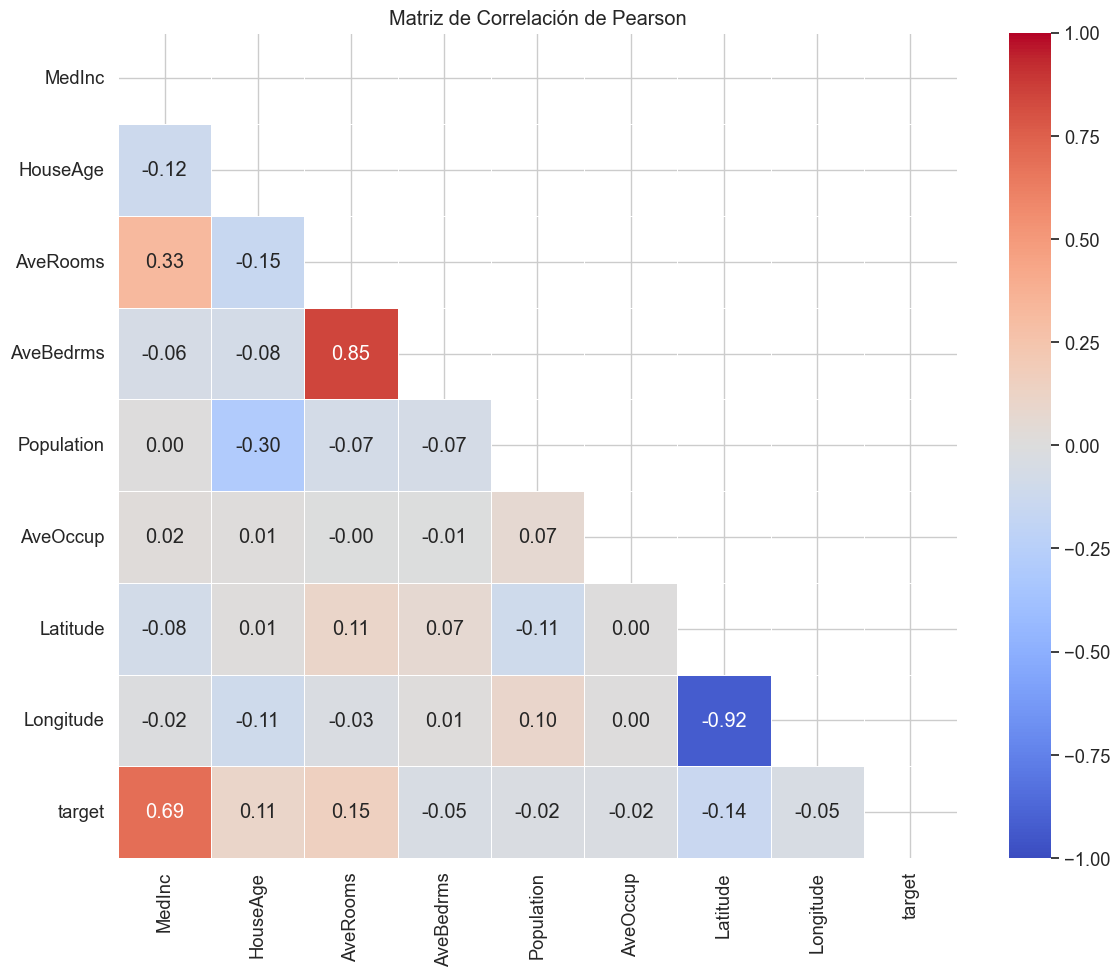


Prueba t para Pearson: t=22.0852, p-valor=0.00000000
IC 95% Pearson: [0.1386, 0.1652]

Ecuación: y = 0.0709x + 1.6838
MSE: 1.3008, RMSE: 1.1405, R²: 0.0231


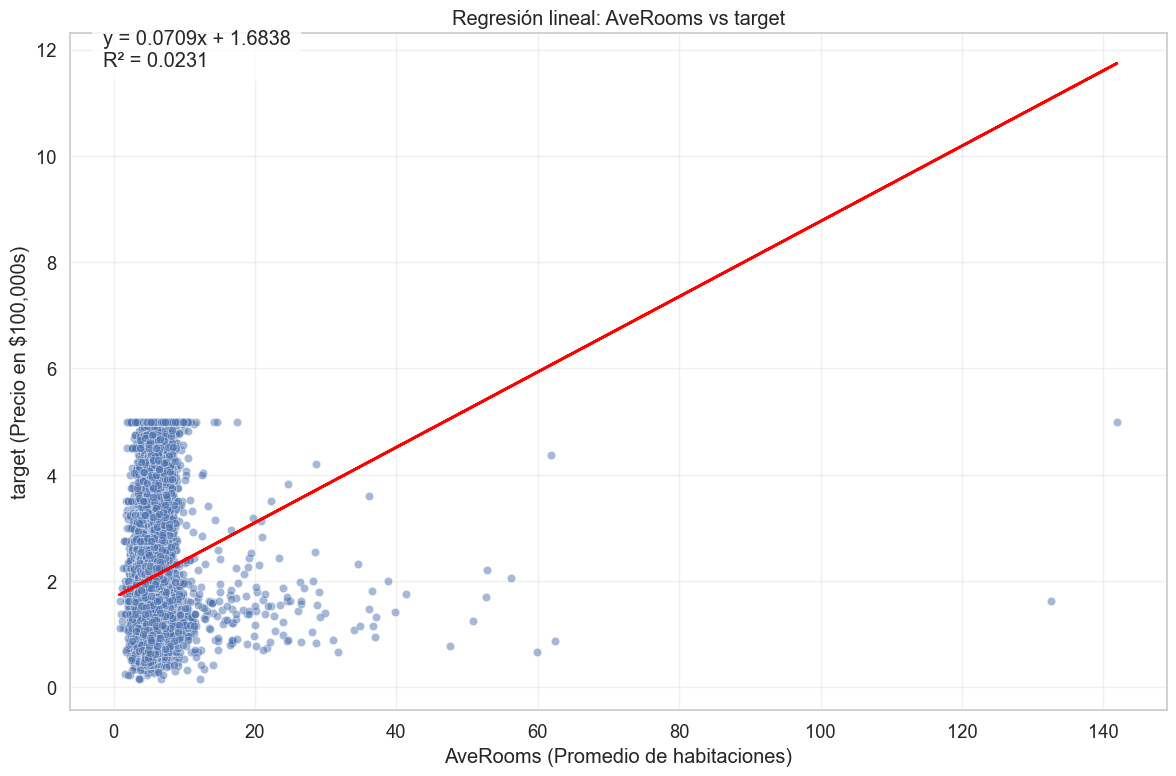

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     487.8
Date:                Fri, 18 Jul 2025   Prob (F-statistic):          7.57e-107
Time:                        11:43:19   Log-Likelihood:                -32001.
No. Observations:               20640   AIC:                         6.401e+04
Df Residuals:                   20638   BIC:                         6.402e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6838      0.019     87.952      0.0

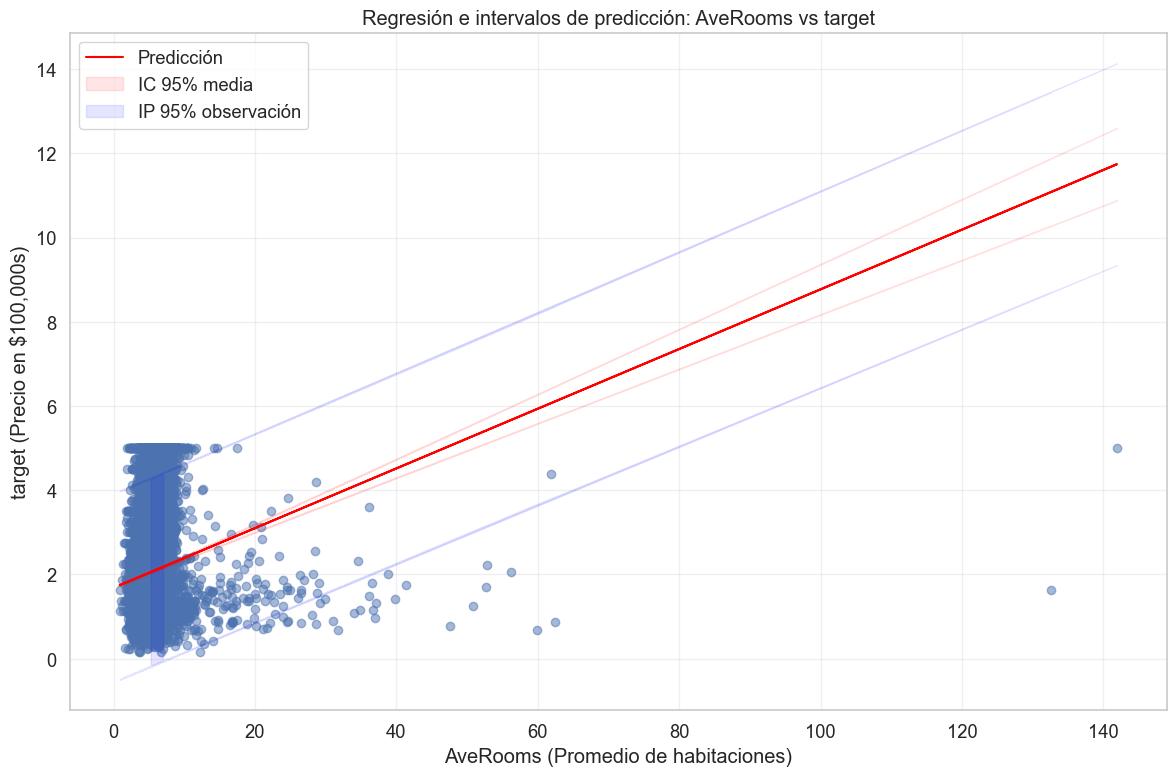


Shapiro residuos (muestra): Estadístico=0.9224, p-valor=0.0000


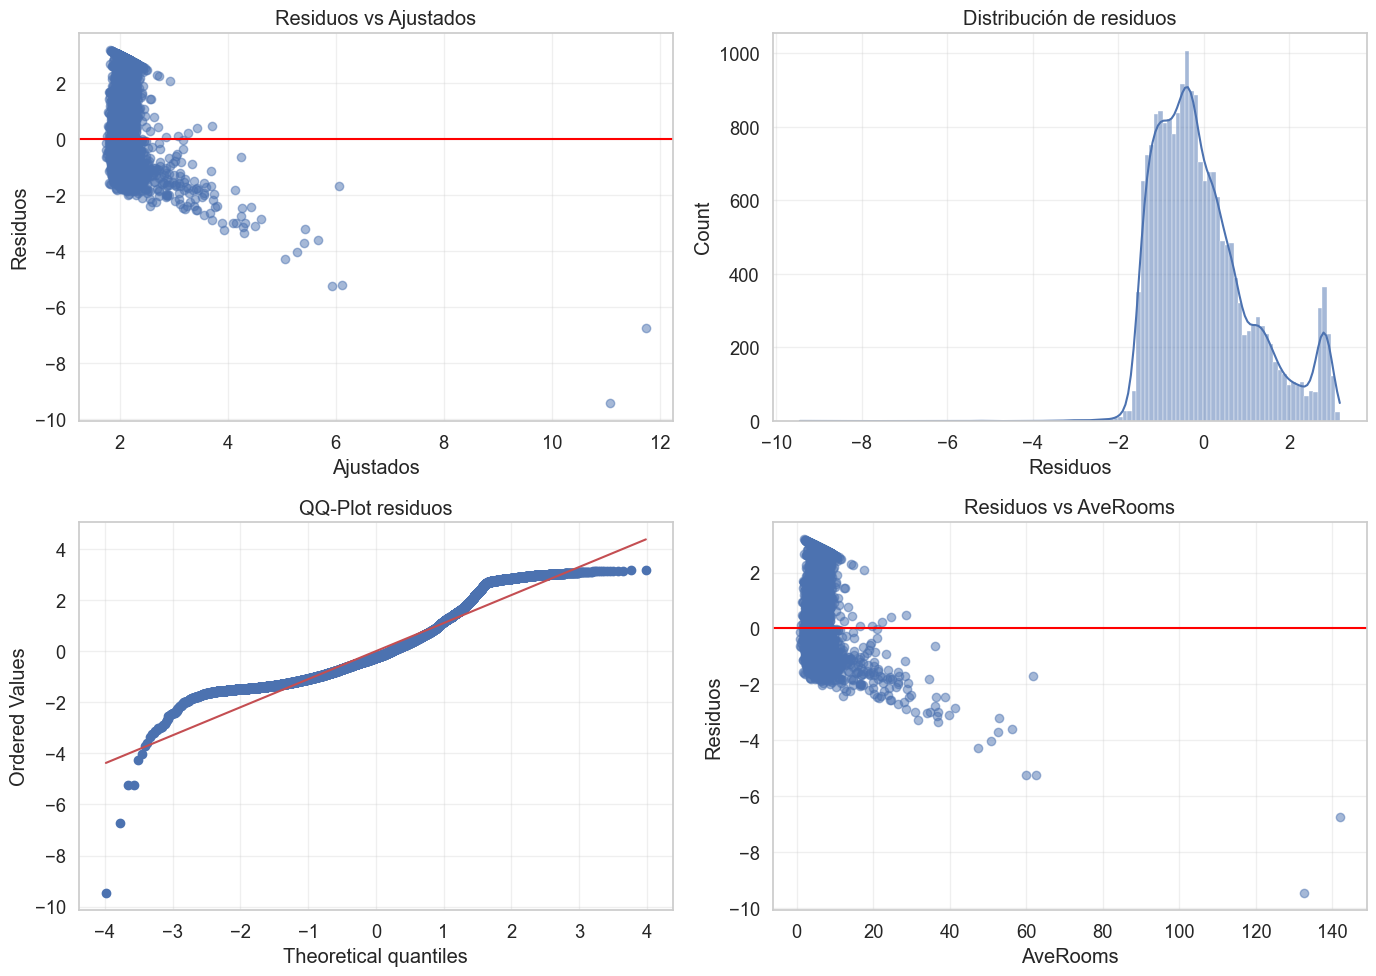


### Conclusiones ###
1. Pearson: 0.1519 entre AveRooms y target, p=0.00000000.
2. Por cada unidad más de AveRooms, target sube 0.0709 (en $100,000s).
3. El modelo explica el 2.31% de la variabilidad en target (R² = 0.0231).
Mejor usar Spearman (0.2634) o Kendall (0.1792) (no normalidad detectada).


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.stats import shapiro, spearmanr, kendalltau, pearsonr

# Configuración de estilo para las gráficas
plt.rcParams['figure.figsize'] = (12, 8)
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# 1. Cargar el conjunto de datos de California Housing de scikit-learn
housing = fetch_california_housing()
X = housing.data
y = housing.target
df = pd.DataFrame(X, columns=housing.feature_names)
df['target'] = y

# Variables de interés
x_var = 'AveRooms'
y_var = 'target'
print(f"Relación entre {x_var} y {y_var} en California Housing")
print("-" * 80)

# 2. Estadísticas descriptivas
print("\n### Estadísticas descriptivas ###")
print(df[[x_var, y_var]].describe())

print(f"\nAsimetría de {x_var}: {df[x_var].skew():.4f}")
print(f"Curtosis de {x_var}: {df[x_var].kurtosis():.4f}")
print(f"Asimetría de {y_var}: {df[y_var].skew():.4f}")
print(f"Curtosis de {y_var}: {df[y_var].kurtosis():.4f}")

# 3. Diagrama de dispersión
plt.figure()
sns.scatterplot(x=df[x_var], y=df[y_var], alpha=0.5)
plt.title(f'Diagrama de dispersión: {x_var} vs {y_var}')
plt.xlabel(f'{x_var} (Promedio de habitaciones)')
plt.ylabel(f'{y_var} (Precio en $100,000s)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Pruebas de normalidad
sample_size = min(5000, len(df))
sample_indices = np.random.choice(len(df), sample_size, replace=False)
sample_df = df.iloc[sample_indices]
stat_x, p_x = shapiro(sample_df[x_var])
stat_y, p_y = shapiro(sample_df[y_var])
print(f"\nShapiro-Wilk para {x_var} (muestra): Estadístico={stat_x:.4f}, p-valor={p_x:.4f}")
print(f"Shapiro-Wilk para {y_var} (muestra): Estadístico={stat_y:.4f}, p-valor={p_y:.4f}")
stat_x_dp, p_x_dp = stats.normaltest(df[x_var])
stat_y_dp, p_y_dp = stats.normaltest(df[y_var])
print(f"D'Agostino-Pearson para {x_var}: Estadístico={stat_x_dp:.4f}, p-valor={p_x_dp:.8f}")
print(f"D'Agostino-Pearson para {y_var}: Estadístico={stat_y_dp:.4f}, p-valor={p_y_dp:.8f}")

# Histogramas y QQ-plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df[x_var], kde=True, ax=axes[0]); axes[0].set_title(f'Distribución de {x_var}'); axes[0].grid(True, alpha=0.3)
sns.histplot(df[y_var], kde=True, ax=axes[1]); axes[1].set_title(f'Distribución de {y_var}'); axes[1].grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
stats.probplot(df[x_var], plot=axes[0]); axes[0].set_title(f'QQ-Plot {x_var}'); axes[0].grid(True, alpha=0.3)
stats.probplot(df[y_var], plot=axes[1]); axes[1].set_title(f'QQ-Plot {y_var}'); axes[1].grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

# 5. Correlaciones
pearson_corr, pearson_p = pearsonr(df[x_var], df[y_var])
spearman_corr, spearman_p = spearmanr(df[x_var], df[y_var])
kendall_corr, kendall_p = kendalltau(df[x_var], df[y_var])
print(f"\nPearson: {pearson_corr:.4f}, p={pearson_p:.8f}")
print(f"Spearman: {spearman_corr:.4f}, p={spearman_p:.8f}")
print(f"Kendall: {kendall_corr:.4f}, p={kendall_p:.8f}")

plt.figure()
sns.regplot(x=df[x_var], y=df[y_var], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title(f'Correlación entre {x_var} y {y_var}')
plt.xlabel(f'{x_var} (Promedio de habitaciones)')
plt.ylabel(f'{y_var} (Precio en $100,000s)')
plt.annotate(f'Pearson: {pearson_corr:.4f}\nSpearman: {spearman_corr:.4f}\nKendall: {kendall_corr:.4f}',
             xy=(0.03, 0.95), xycoords='axes fraction', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
corr_matrix = df.corr(method='pearson')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Pearson')
plt.tight_layout()
plt.show()

# 6. Prueba de significancia para la correlación de Pearson y su intervalo de confianza
n = len(df[x_var])
t_stat = pearson_corr * np.sqrt((n - 2) / (1 - pearson_corr**2))
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), n - 2))
z = np.arctanh(pearson_corr)
se = 1 / np.sqrt(n - 3)
ci_lower = np.tanh(z - 1.96 * se)
ci_upper = np.tanh(z + 1.96 * se)
print(f"\nPrueba t para Pearson: t={t_stat:.4f}, p-valor={p_value:.8f}")
print(f"IC 95% Pearson: [{ci_lower:.4f}, {ci_upper:.4f}]")

# 7. Regresión lineal (sklearn)
X_reg = df[[x_var]]
y_reg = df[y_var]
model = LinearRegression().fit(X_reg, y_reg)
y_pred = model.predict(X_reg)
mse = mean_squared_error(y_reg, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_reg, y_pred)
print(f"\nEcuación: y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}")
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

plt.figure()
sns.scatterplot(x=df[x_var], y=df[y_var], alpha=0.5)
plt.plot(df[x_var], y_pred, color='red', linewidth=2)
plt.title(f'Regresión lineal: {x_var} vs {y_var}')
plt.xlabel(f'{x_var} (Promedio de habitaciones)')
plt.ylabel(f'{y_var} (Precio en $100,000s)')
plt.annotate(f'y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}\nR² = {r2:.4f}',
             xy=(0.03, 0.95), xycoords='axes fraction', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 8. Regresión lineal y predicción con statsmodels
X_sm = sm.add_constant(X_reg)
model_sm = sm.OLS(y_reg, X_sm).fit()
print(model_sm.summary())
predictions = model_sm.get_prediction(X_sm)
pred_summary = predictions.summary_frame(alpha=0.05)

plt.figure()
plt.scatter(df[x_var], df[y_var], alpha=0.5)
plt.plot(df[x_var], pred_summary['mean'], color='red', label='Predicción')
plt.fill_between(df[x_var], pred_summary['mean_ci_lower'], pred_summary['mean_ci_upper'],
                 color='red', alpha=0.1, label='IC 95% media')
plt.fill_between(df[x_var], pred_summary['obs_ci_lower'], pred_summary['obs_ci_upper'],
                 color='blue', alpha=0.1, label='IP 95% observación')
plt.title(f'Regresión e intervalos de predicción: {x_var} vs {y_var}')
plt.xlabel(f'{x_var} (Promedio de habitaciones)')
plt.ylabel(f'{y_var} (Precio en $100,000s)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 9. Diagnóstico de residuos
residuos = df[y_var] - y_pred
stat_residuos, p_residuos = shapiro(sample_df[y_var] - model.predict(sample_df[[x_var]]))
print(f"\nShapiro residuos (muestra): Estadístico={stat_residuos:.4f}, p-valor={p_residuos:.4f}")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes[0, 0].scatter(y_pred, residuos, alpha=0.5)
axes[0, 0].axhline(0, color='red')
axes[0, 0].set_title('Residuos vs Ajustados')
axes[0, 0].set_xlabel('Ajustados')
axes[0, 0].set_ylabel('Residuos')
axes[0, 0].grid(True, alpha=0.3)
sns.histplot(residuos, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de residuos')
axes[0, 1].set_xlabel('Residuos')
axes[0, 1].grid(True, alpha=0.3)
stats.probplot(residuos, plot=axes[1, 0])
axes[1, 0].set_title('QQ-Plot residuos')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 1].scatter(df[x_var], residuos, alpha=0.5)
axes[1, 1].axhline(0, color='red')
axes[1, 1].set_title(f'Residuos vs {x_var}')
axes[1, 1].set_xlabel(x_var)
axes[1, 1].set_ylabel('Residuos')
axes[1, 1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 10. Conclusiones
print("\n### Conclusiones ###")
print(f"1. Pearson: {pearson_corr:.4f} entre {x_var} y {y_var}, p={pearson_p:.8f}.")
print(f"2. Por cada unidad más de {x_var}, {y_var} sube {model.coef_[0]:.4f} (en $100,000s).")
print(f"3. El modelo explica el {r2*100:.2f}% de la variabilidad en {y_var} (R² = {r2:.4f}).")
if p_x > 0.05 and p_y > 0.05:
    print(f"Pearson ({pearson_corr:.4f}) es adecuado (ambas variables normales).")
else:
    print(f"Mejor usar Spearman ({spearman_corr:.4f}) o Kendall ({kendall_corr:.4f}) (no normalidad detectada).")


Correlación objetivo: -1
Correlación obtenida: -1.0000

### Estadísticas descriptivas ###
              x_var         y_var
count  10000.000000  10000.000000
mean      50.000000    100.000000
std       15.000750     20.001000
min       -8.603995     21.699703
25%       39.977381     86.581449
50%       49.993139    100.009149
75%       60.063913    113.363492
max      108.725223    178.138660

### Análisis de distribución de variables ###
Asimetría (skewness) de x_var: 0.0020
Curtosis de x_var: 0.0271
Asimetría (skewness) de y_var: -0.0020
Curtosis de y_var: 0.0271


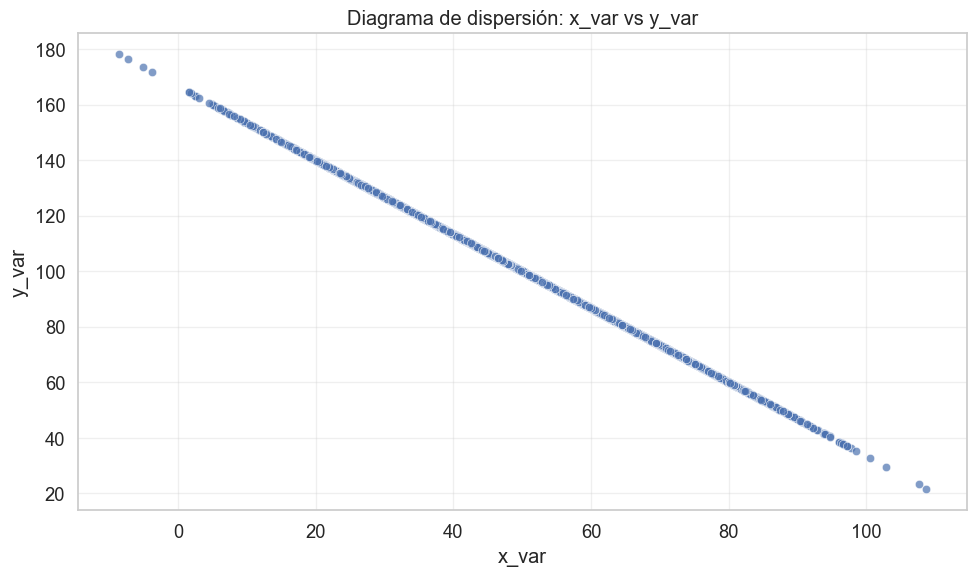


### Pruebas de normalidad ###
Prueba de Shapiro-Wilk para x_var:
Estadístico: 0.9999, p-valor: 0.9985
Conclusión: Distribución normal

Prueba de Shapiro-Wilk para y_var:
Estadístico: 0.9999, p-valor: 0.9985
Conclusión: Distribución normal


c:\Users\anfalear\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


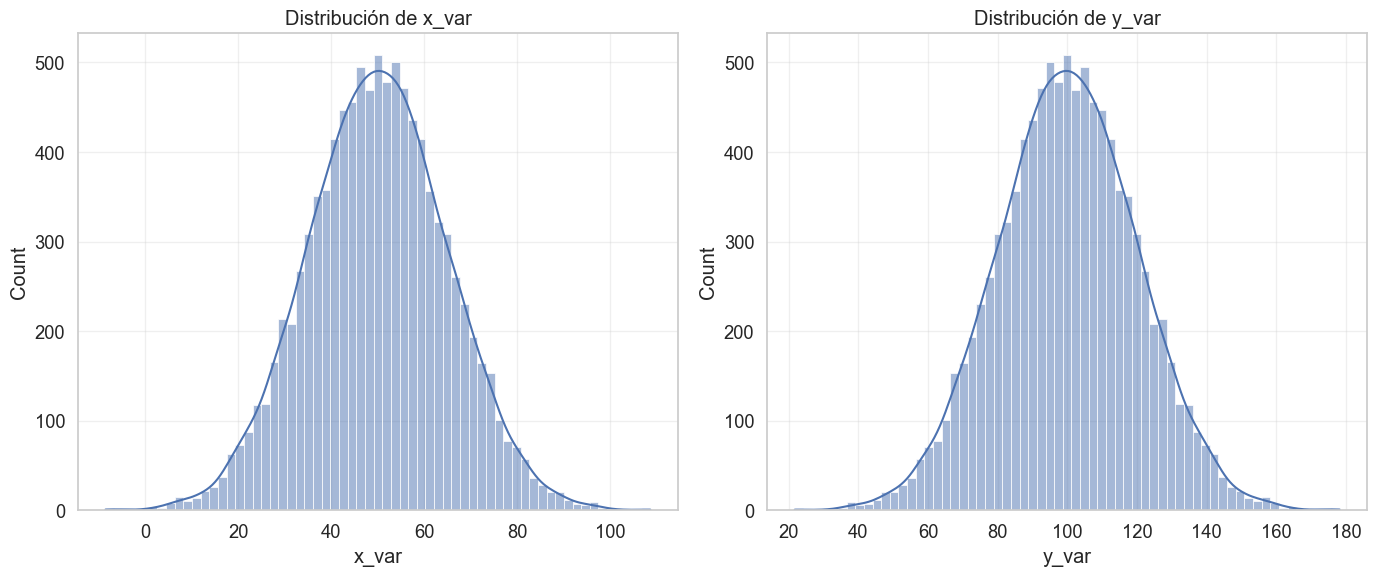

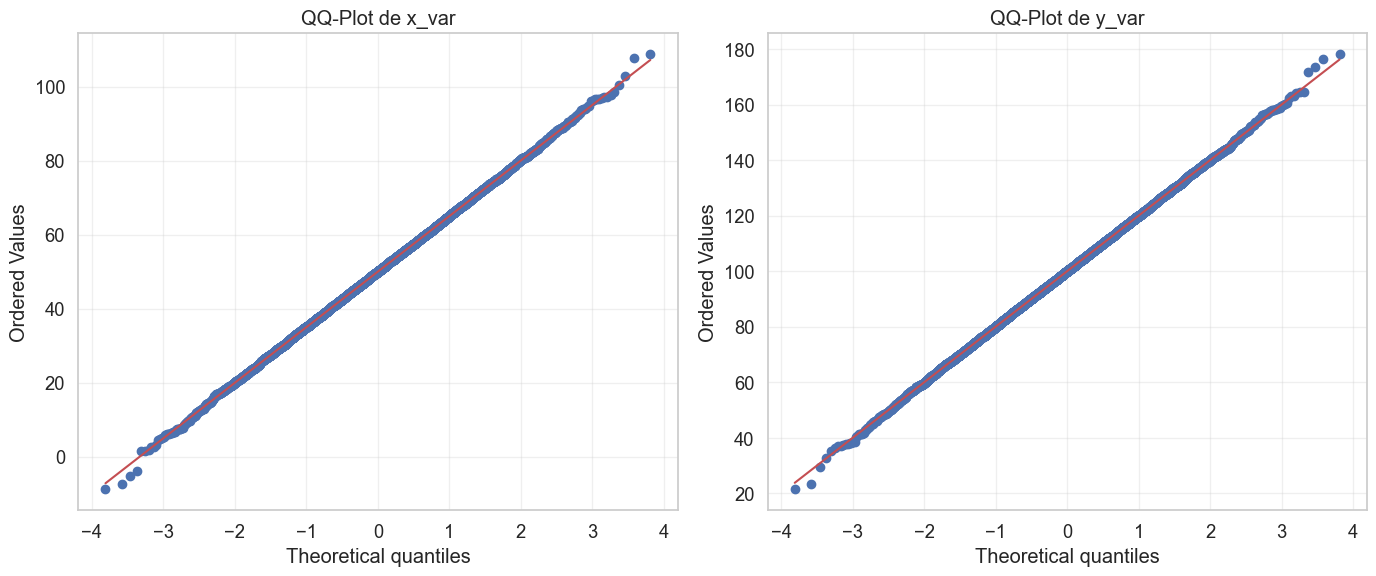


### Coeficientes de correlación ###
Coeficiente de correlación de Pearson: -1.0000
p-valor: 0.00000000
Significancia: Estadísticamente significativo

Coeficiente de correlación de Spearman: -1.0000
p-valor: 0.00000000
Significancia: Estadísticamente significativo

Coeficiente de correlación de Kendall: -1.0000
p-valor: 0.00000000
Significancia: Estadísticamente significativo


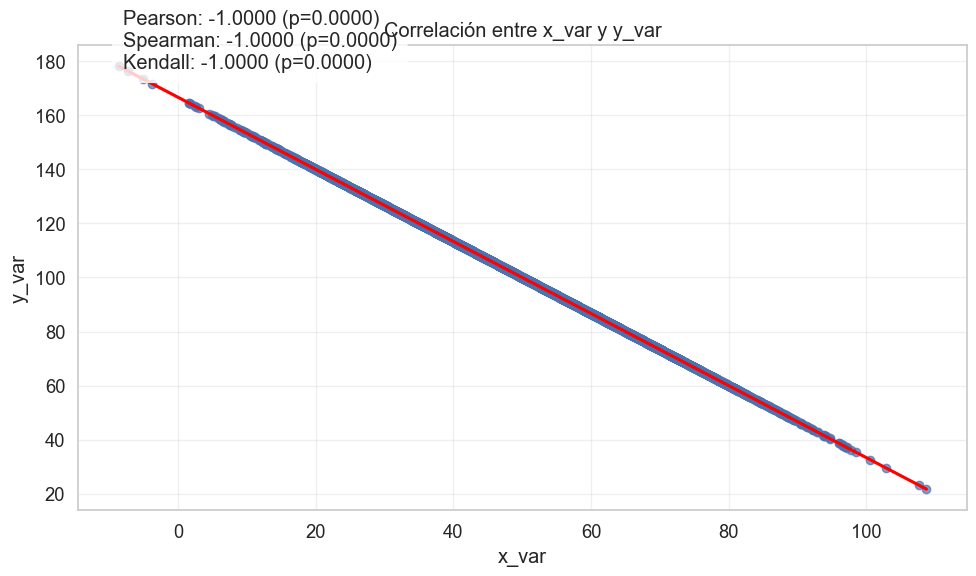


### Comparación de los coeficientes de correlación ###


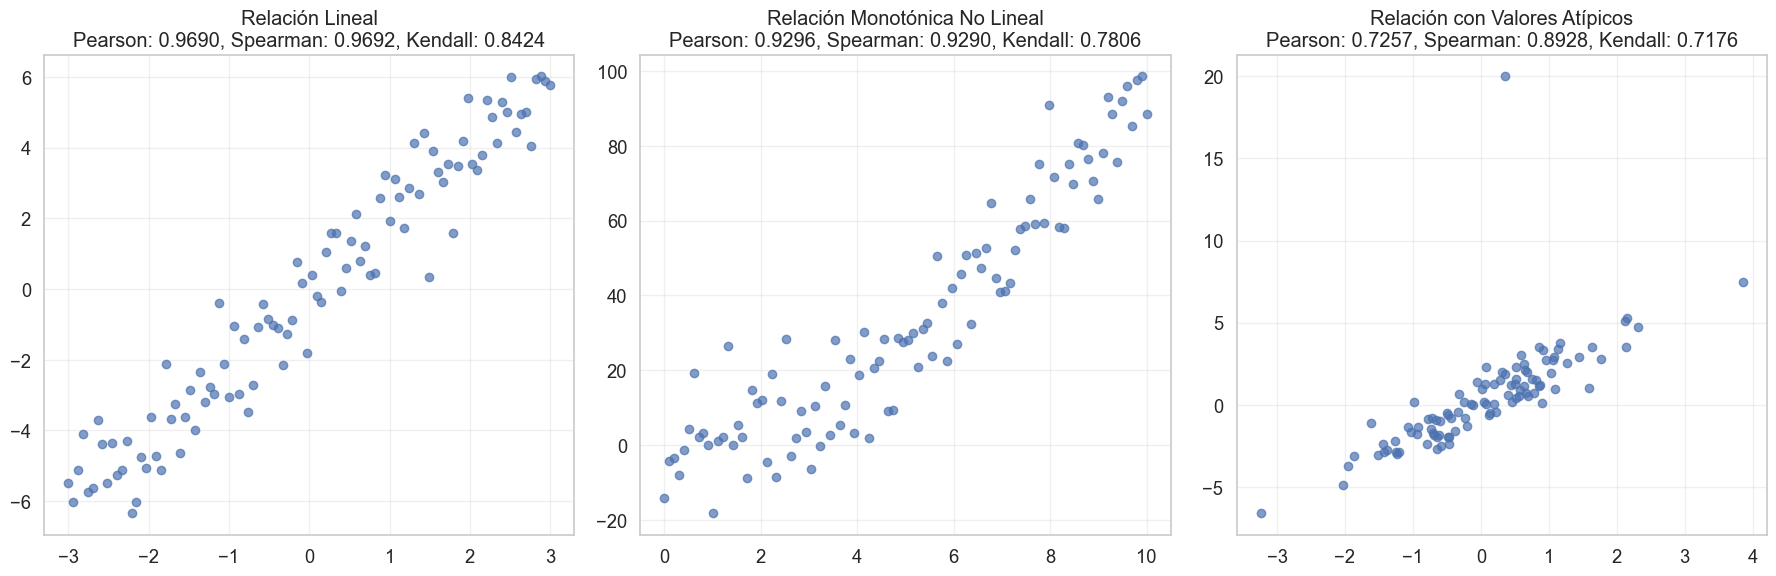


Cuándo usar cada coeficiente de correlación:
- Pearson: Cuando la relación es lineal y los datos siguen una distribución normal (como en nuestro caso).
- Spearman: Cuando la relación es monotónica pero no necesariamente lineal, o cuando hay valores atípicos.
- Kendall: Similar a Spearman, pero más robusto con muestras pequeñas y menos sensible a errores.

### Prueba de significancia de la correlación ###
Prueba t para la correlación de Pearson:
t estadístico: -inf
p-valor: 0.00000000
Conclusión: Rechazamos H0
Interpretación: Existe una correlación significativa

Intervalo de confianza (95%) para la correlación de Pearson:
[-1.0000, -1.0000]

### Regresión Lineal por Mínimos Cuadrados ###
Coeficiente (pendiente): -1.3333
Intercepto: 166.6667
Ecuación de la recta: y = -1.3333x + 166.6667

Métricas del modelo:
Error cuadrático medio (MSE): 0.0000
Raíz del error cuadrático medio (RMSE): 0.0000
Coeficiente de determinación (R²): 1.0000
Interpretación de R²: 100.00% de la variabilidad en y_

C:\Users\anfalear\AppData\Local\Temp\ipykernel_18560\524333828.py:217: RuntimeWarning: divide by zero encountered in scalar divide
  t_stat = pearson_corr * np.sqrt((n - 2) / (1 - pearson_corr**2))
C:\Users\anfalear\AppData\Local\Temp\ipykernel_18560\524333828.py:227: RuntimeWarning: divide by zero encountered in arctanh
  z = np.arctanh(pearson_corr)


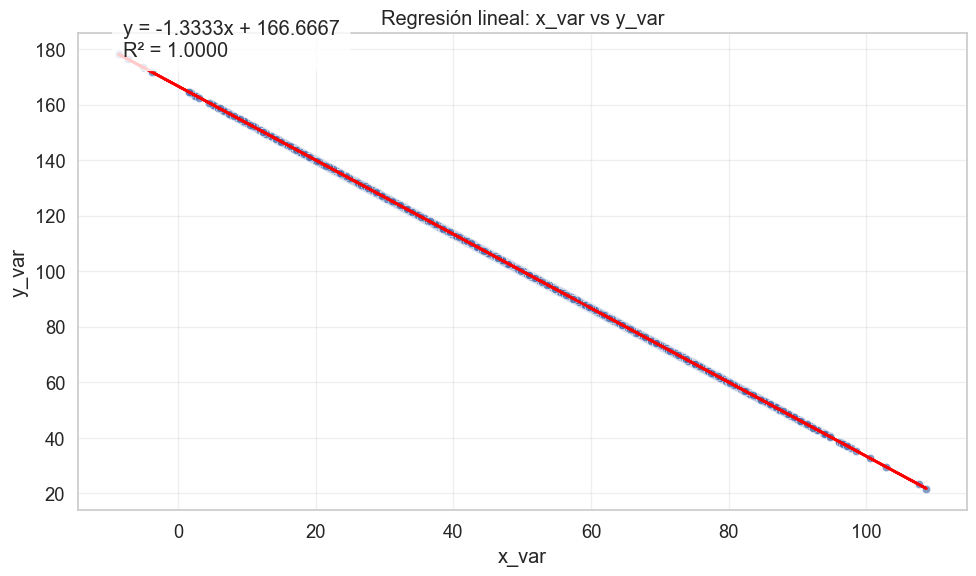


### Análisis de Regresión con statsmodels ###
                            OLS Regression Results                            
Dep. Variable:                  y_var   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.160e+32
Date:                Fri, 18 Jul 2025   Prob (F-statistic):               0.00
Time:                        11:43:25   Log-Likelihood:             2.8731e+05
No. Observations:               10000   AIC:                        -5.746e+05
Df Residuals:                    9998   BIC:                        -5.746e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

C:\Users\anfalear\AppData\Local\Temp\ipykernel_18560\524333828.py:291: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"p-valor para x_var: {p_values[1]:.8f}")
C:\Users\anfalear\AppData\Local\Temp\ipykernel_18560\524333828.py:292: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Conclusión: {'La pendiente es estadísticamente significativa' if p_values[1] < 0.05 else 'La pendiente no es estadísticamente significativa'}")


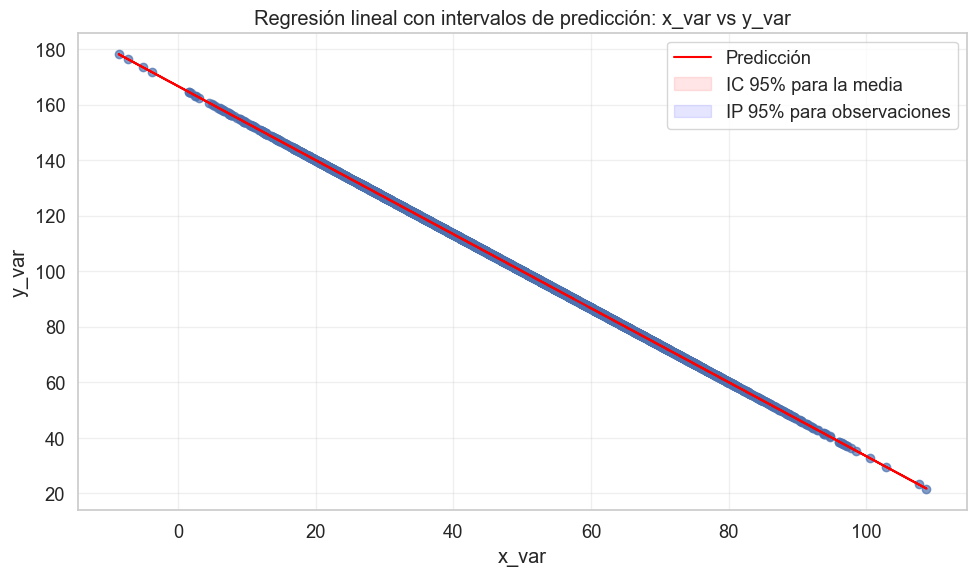


### Diagnóstico de Residuos ###
Prueba de Shapiro-Wilk para residuos:
Estadístico: 0.7770, p-valor: 0.0000
Conclusión: Residuos no siguen una distribución normal


c:\Users\anfalear\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


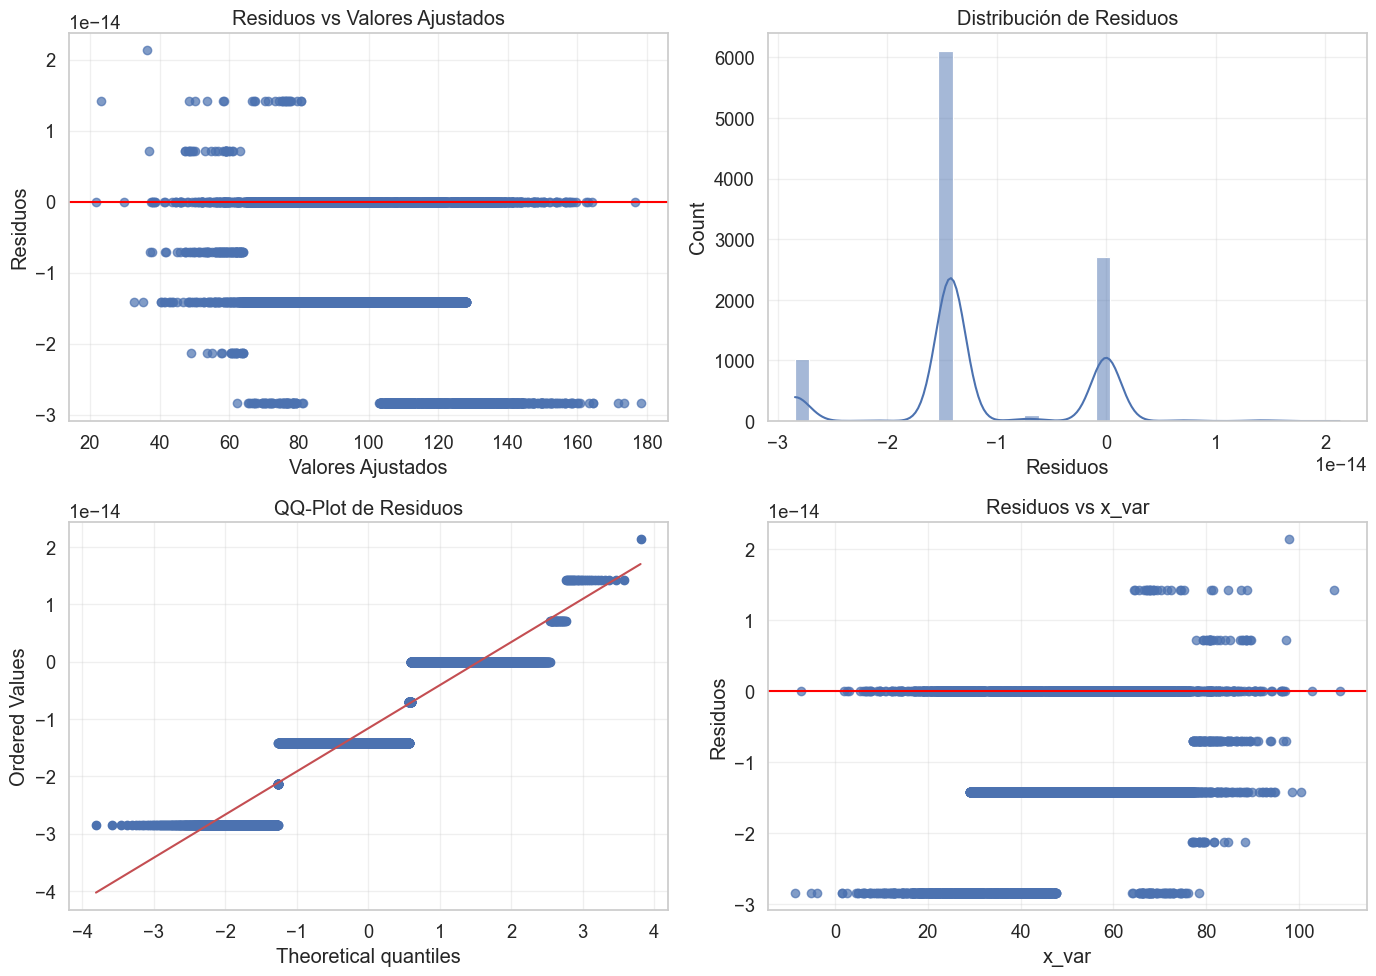


### Prueba de Homocedasticidad ###
Prueba de Breusch-Pagan:
LM Statistic: 1244.6339
LM-Test p-value: 0.0000
F-Statistic: 1421.2826
F-Test p-value: 0.0000
Conclusión: Heterocedasticidad

### Conclusiones ###
1. El análisis muestra una correlación de -1.0000 entre x_var y y_var, que es estadísticamente significativa (p=0.00000000).
2. La regresión lineal indica que por cada unidad de aumento en x_var, y_var aumenta en -1.3333 unidades.
3. El modelo explica el 100.00% de la variabilidad en y_var (R² = 1.0000).

Recomendación sobre el coeficiente de correlación más adecuado:
El conjunto de datos no cumple con todos los supuestos para utilizar el coeficiente de Pearson.
El coeficiente de Kendall (-1.0000) podría ser más apropiado.

Este análisis muestra claramente una fuerte relación lineal entre las variables, con un alto coeficiente de determinación.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_diabetes, make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
from scipy.stats import shapiro, spearmanr, kendalltau, pearsonr
from statsmodels.stats.diagnostic import het_breuschpagan

# Configuración de estilo para las gráficas
plt.rcParams['figure.figsize'] = (12, 8)
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Generamos datos con una correlación cercana al 90%
np.random.seed(42)  # Para reproducibilidad

# Crear un conjunto de datos con correlación aproximada del 90%
n = 10000  # Número de observaciones
target_corr = -1  # Correlación objetivo

# Generar datos con distribución normal
x = np.random.normal(0, 1, n)

# Crear y con una correlación específica con x
# La fórmula es y = r*x + e*sqrt(1-r^2) donde r es la correlación objetivo
# y e es un término de error con distribución normal
noise = np.random.normal(0, 1, n)
y = target_corr * x + np.sqrt(1 - target_corr**2) * noise

# Asegurarse de que los datos están bien formados
x = (x - np.mean(x)) / np.std(x)  # Estandarizar x
y = (y - np.mean(y)) / np.std(y)  # Estandarizar y

# Trasladar datos a valores más intuitivos (escala de 0-100 para X, 50-150 para Y)
x = x * 15 + 50  # Centrado en 50 con desviación de 15
y = y * 20 + 100  # Centrado en 100 con desviación de 20

# Crear un DataFrame para nuestros datos
df = pd.DataFrame({'x_var': x, 'y_var': y})

# Verificar la correlación obtenida
actual_corr = pearsonr(df['x_var'], df['y_var'])[0]
print(f"Correlación objetivo: {target_corr}")
print(f"Correlación obtenida: {actual_corr:.4f}")

# Análisis exploratorio inicial - Estadísticas Descriptivas
print("\n### Estadísticas descriptivas ###")
print(df.describe())

# Análisis de la distribución de las variables
print("\n### Análisis de distribución de variables ###")
print(f"Asimetría (skewness) de x_var: {df['x_var'].skew():.4f}")
print(f"Curtosis de x_var: {df['x_var'].kurtosis():.4f}")
print(f"Asimetría (skewness) de y_var: {df['y_var'].skew():.4f}")
print(f"Curtosis de y_var: {df['y_var'].kurtosis():.4f}")

# Diagrama de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['x_var'], y=df['y_var'], alpha=0.7)
plt.title('Diagrama de dispersión: x_var vs y_var')
plt.xlabel('x_var')
plt.ylabel('y_var')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Pruebas de normalidad
print("\n### Pruebas de normalidad ###")
# Prueba de Shapiro-Wilk para x_var
stat_x, p_x = shapiro(df['x_var'])
print(f"Prueba de Shapiro-Wilk para x_var:")
print(f"Estadístico: {stat_x:.4f}, p-valor: {p_x:.4f}")
print(f"Conclusión: {'Distribución normal' if p_x > 0.05 else 'No sigue una distribución normal'}")

# Prueba de Shapiro-Wilk para y_var
stat_y, p_y = shapiro(df['y_var'])
print(f"\nPrueba de Shapiro-Wilk para y_var:")
print(f"Estadístico: {stat_y:.4f}, p-valor: {p_y:.4f}")
print(f"Conclusión: {'Distribución normal' if p_y > 0.05 else 'No sigue una distribución normal'}")

# Visualización de la distribución con histogramas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma para x_var
sns.histplot(df['x_var'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de x_var')
axes[0].set_xlabel('x_var')
axes[0].grid(True, alpha=0.3)

# Histograma para y_var
sns.histplot(df['y_var'], kde=True, ax=axes[1])
axes[1].set_title('Distribución de y_var')
axes[1].set_xlabel('y_var')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# QQ-plots para verificar normalidad
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# QQ-plot para x_var
stats.probplot(df['x_var'], plot=axes[0])
axes[0].set_title('QQ-Plot de x_var')
axes[0].grid(True, alpha=0.3)

# QQ-plot para y_var
stats.probplot(df['y_var'], plot=axes[1])
axes[1].set_title('QQ-Plot de y_var')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Coeficientes de correlación
print("\n### Coeficientes de correlación ###")

# Pearson (paramétrico, asume normalidad)
pearson_corr, pearson_p = pearsonr(df['x_var'], df['y_var'])
print(f"Coeficiente de correlación de Pearson: {pearson_corr:.4f}")
print(f"p-valor: {pearson_p:.8f}")
print(f"Significancia: {'Estadísticamente significativo' if pearson_p < 0.05 else 'No significativo'}")

# Spearman (no paramétrico, basado en rangos)
spearman_corr, spearman_p = spearmanr(df['x_var'], df['y_var'])
print(f"\nCoeficiente de correlación de Spearman: {spearman_corr:.4f}")
print(f"p-valor: {spearman_p:.8f}")
print(f"Significancia: {'Estadísticamente significativo' if spearman_p < 0.05 else 'No significativo'}")

# Kendall (no paramétrico, basado en concordancias)
kendall_corr, kendall_p = kendalltau(df['x_var'], df['y_var'])
print(f"\nCoeficiente de correlación de Kendall: {kendall_corr:.4f}")
print(f"p-valor: {kendall_p:.8f}")
print(f"Significancia: {'Estadísticamente significativo' if kendall_p < 0.05 else 'No significativo'}")

# Visualización de la correlación
plt.figure(figsize=(10, 6))
sns.regplot(x=df['x_var'], y=df['y_var'], scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Correlación entre x_var y y_var')
plt.xlabel('x_var')
plt.ylabel('y_var')
plt.annotate(f'Pearson: {pearson_corr:.4f} (p={pearson_p:.4f})\nSpearman: {spearman_corr:.4f} (p={spearman_p:.4f})\nKendall: {kendall_corr:.4f} (p={kendall_p:.4f})',
             xy=(0.05, 0.95), xycoords='axes fraction', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Comparación de coeficientes de correlación con visualizaciones
print("\n### Comparación de los coeficientes de correlación ###")

# Crear datos sintéticos para demostrar cuándo usar cada coeficiente
np.random.seed(42)
n = 100

# Caso lineal (ideal para Pearson)
x_linear = np.linspace(-3, 3, n)
y_linear = 2 * x_linear + np.random.normal(0, 1, n)

# Caso monotónico no lineal (mejor para Spearman)
x_nonlinear = np.linspace(0, 10, n)
y_nonlinear = x_nonlinear**2 + np.random.normal(0, 10, n)

# Caso con valores atípicos (mejor para Spearman/Kendall)
x_outliers = np.random.normal(0, 1, n)
y_outliers = 2 * x_outliers + np.random.normal(0, 1, n)
y_outliers[0] = 20  # añadimos un valor atípico

# Visualizar los diferentes casos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Caso lineal
axes[0].scatter(x_linear, y_linear, alpha=0.7)
p_linear = pearsonr(x_linear, y_linear)[0]
s_linear = spearmanr(x_linear, y_linear)[0]
k_linear = kendalltau(x_linear, y_linear)[0]
axes[0].set_title(f'Relación Lineal\nPearson: {p_linear:.4f}, Spearman: {s_linear:.4f}, Kendall: {k_linear:.4f}')
axes[0].grid(True, alpha=0.3)

# Caso monotónico no lineal
axes[1].scatter(x_nonlinear, y_nonlinear, alpha=0.7)
p_nonlinear = pearsonr(x_nonlinear, y_nonlinear)[0]
s_nonlinear = spearmanr(x_nonlinear, y_nonlinear)[0]
k_nonlinear = kendalltau(x_nonlinear, y_nonlinear)[0]
axes[1].set_title(f'Relación Monotónica No Lineal\nPearson: {p_nonlinear:.4f}, Spearman: {s_nonlinear:.4f}, Kendall: {k_nonlinear:.4f}')
axes[1].grid(True, alpha=0.3)

# Caso con valores atípicos
axes[2].scatter(x_outliers, y_outliers, alpha=0.7)
p_outliers = pearsonr(x_outliers, y_outliers)[0]
s_outliers = spearmanr(x_outliers, y_outliers)[0]
k_outliers = kendalltau(x_outliers, y_outliers)[0]
axes[2].set_title(f'Relación con Valores Atípicos\nPearson: {p_outliers:.4f}, Spearman: {s_outliers:.4f}, Kendall: {k_outliers:.4f}')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nCuándo usar cada coeficiente de correlación:")
print("- Pearson: Cuando la relación es lineal y los datos siguen una distribución normal (como en nuestro caso).")
print("- Spearman: Cuando la relación es monotónica pero no necesariamente lineal, o cuando hay valores atípicos.")
print("- Kendall: Similar a Spearman, pero más robusto con muestras pequeñas y menos sensible a errores.")

# Prueba de significancia de la correlación
print("\n### Prueba de significancia de la correlación ###")

# Prueba de hipótesis sobre la correlación
# H0: correlación = 0 (no hay correlación)
# H1: correlación ≠ 0 (hay correlación)

# Calculamos t estadístico para la correlación de Pearson
n = len(df['x_var'])
t_stat = pearson_corr * np.sqrt((n - 2) / (1 - pearson_corr**2))
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), n - 2))

print(f"Prueba t para la correlación de Pearson:")
print(f"t estadístico: {t_stat:.4f}")
print(f"p-valor: {p_value:.8f}")
print(f"Conclusión: {'Rechazamos H0' if p_value < 0.05 else 'No rechazamos H0'}")
print(f"Interpretación: {'Existe una correlación significativa' if p_value < 0.05 else 'No hay evidencia de correlación significativa'}")

# Intervalo de confianza para el coeficiente de correlación
z = np.arctanh(pearson_corr)
se = 1 / np.sqrt(n - 3)
ci_lower = np.tanh(z - 1.96 * se)
ci_upper = np.tanh(z + 1.96 * se)

print(f"\nIntervalo de confianza (95%) para la correlación de Pearson:")
print(f"[{ci_lower:.4f}, {ci_upper:.4f}]")

# Regresión lineal con mínimos cuadrados
print("\n### Regresión Lineal por Mínimos Cuadrados ###")

# Preparar los datos para la regresión
X_reg = df[['x_var']]
y_reg = df['y_var']

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_reg, y_reg)

# Coeficientes del modelo
print(f"Coeficiente (pendiente): {model.coef_[0]:.4f}")
print(f"Intercepto: {model.intercept_:.4f}")
print(f"Ecuación de la recta: y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}")

# Predicciones
y_pred = model.predict(X_reg)

# Métricas de rendimiento
mse = mean_squared_error(y_reg, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_reg, y_pred)

print(f"\nMétricas del modelo:")
print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")
print(f"Interpretación de R²: {r2*100:.2f}% de la variabilidad en y_var es explicada por x_var")

# Visualización de la regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['x_var'], y=df['y_var'], alpha=0.7)
plt.plot(df['x_var'], y_pred, color='red', linewidth=2)
plt.title('Regresión lineal: x_var vs y_var')
plt.xlabel('x_var')
plt.ylabel('y_var')
plt.annotate(f'y = {model.coef_[0]:.4f}x + {model.intercept_:.4f}\nR² = {r2:.4f}',
             xy=(0.05, 0.95), xycoords='axes fraction', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis detallado con statsmodels para pruebas de significancia
print("\n### Análisis de Regresión con statsmodels ###")

# Ajustar el modelo con statsmodels (incluye el intercepto)
X_sm = sm.add_constant(X_reg)
model_sm = sm.OLS(y_reg, X_sm).fit()

# Resumen del modelo
print(model_sm.summary())

# Extraer los p-valores
p_values = model_sm.pvalues
print(f"\nPrueba de significancia para la pendiente:")
print(f"p-valor para x_var: {p_values[1]:.8f}")
print(f"Conclusión: {'La pendiente es estadísticamente significativa' if p_values[1] < 0.05 else 'La pendiente no es estadísticamente significativa'}")

# Intervalos de predicción
print("\n### Intervalos de Predicción ###")

# Obtener la predicción e intervalos de confianza/predicción
predictions = model_sm.get_prediction(X_sm)
prediction_summary = predictions.summary_frame(alpha=0.05)

# Visualización de los intervalos de predicción
plt.figure(figsize=(10, 6))
plt.scatter(df['x_var'], df['y_var'], alpha=0.7)
plt.plot(df['x_var'], prediction_summary['mean'], color='red', label='Predicción')
plt.fill_between(df['x_var'],
                 prediction_summary['mean_ci_lower'],
                 prediction_summary['mean_ci_upper'],
                 color='red', alpha=0.1, label='IC 95% para la media')
plt.fill_between(df['x_var'],
                 prediction_summary['obs_ci_lower'],
                 prediction_summary['obs_ci_upper'],
                 color='blue', alpha=0.1, label='IP 95% para observaciones')
plt.title('Regresión lineal con intervalos de predicción: x_var vs y_var')
plt.xlabel('x_var')
plt.ylabel('y_var')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Diagnóstico de residuos
print("\n### Diagnóstico de Residuos ###")

# Calcular los residuos
residuos = df['y_var'] - y_pred

# Prueba de normalidad para los residuos
stat_residuos, p_residuos = shapiro(residuos)
print(f"Prueba de Shapiro-Wilk para residuos:")
print(f"Estadístico: {stat_residuos:.4f}, p-valor: {p_residuos:.4f}")
print(f"Conclusión: {'Residuos normalmente distribuidos' if p_residuos > 0.05 else 'Residuos no siguen una distribución normal'}")

# Gráficos de diagnóstico
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Residuos vs valores ajustados
axes[0, 0].scatter(y_pred, residuos, alpha=0.7)
axes[0, 0].axhline(y=0, color='red', linestyle='-')
axes[0, 0].set_title('Residuos vs Valores Ajustados')
axes[0, 0].set_xlabel('Valores Ajustados')
axes[0, 0].set_ylabel('Residuos')
axes[0, 0].grid(True, alpha=0.3)

# Histograma de residuos
sns.histplot(residuos, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Residuos')
axes[0, 1].set_xlabel('Residuos')
axes[0, 1].grid(True, alpha=0.3)

# QQ-plot de residuos
stats.probplot(residuos, plot=axes[1, 0])
axes[1, 0].set_title('QQ-Plot de Residuos')
axes[1, 0].grid(True, alpha=0.3)

# Residuos vs variable predictora
axes[1, 1].scatter(df['x_var'], residuos, alpha=0.7)
axes[1, 1].axhline(y=0, color='red', linestyle='-')
axes[1, 1].set_title('Residuos vs x_var')
axes[1, 1].set_xlabel('x_var')
axes[1, 1].set_ylabel('Residuos')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Homogeneidad de varianzas (homocedasticidad)
print("\n### Prueba de Homocedasticidad ###")

# Prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuos, X_sm)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(f"Prueba de Breusch-Pagan:")
for label, value in zip(labels, bp_test):
    print(f"{label}: {value:.4f}")
print(f"Conclusión: {'Homocedasticidad' if bp_test[1] > 0.05 else 'Heterocedasticidad'}")

# Conclusiones
print("\n### Conclusiones ###")
print(f"1. El análisis muestra una correlación de {pearson_corr:.4f} entre x_var y y_var, que es estadísticamente significativa (p={pearson_p:.8f}).")
print(f"2. La regresión lineal indica que por cada unidad de aumento en x_var, y_var aumenta en {model.coef_[0]:.4f} unidades.")
print(f"3. El modelo explica el {r2*100:.2f}% de la variabilidad en y_var (R² = {r2:.4f}).")

print(f"\nRecomendación sobre el coeficiente de correlación más adecuado:")
if p_x > 0.05 and p_y > 0.05 and p_residuos > 0.05 and bp_test[1] > 0.05:
    print(f"El conjunto de datos cumple con los supuestos de normalidad y homocedasticidad.")
    print(f"El coeficiente de Pearson ({pearson_corr:.4f}) es la medida más apropiada para este conjunto de datos.")
else:
    print(f"El conjunto de datos no cumple con todos los supuestos para utilizar el coeficiente de Pearson.")
    if spearman_corr > kendall_corr:
        print(f"El coeficiente de Spearman ({spearman_corr:.4f}) podría ser más apropiado.")
    else:
        print(f"El coeficiente de Kendall ({kendall_corr:.4f}) podría ser más apropiado.")

print("\nEste análisis muestra claramente una fuerte relación lineal entre las variables, con un alto coeficiente de determinación.")